## Calgary Exploratory Data Analysis

Note: Calgary data file is too large for github. Data can be downloaded here: https://data.calgary.ca/Transportation-Transit/Transit-Incident-Log/9m8z-ibsn

In [155]:
import os
import json
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#Import bus data
calgary_data= pd.read_csv('Transit_Incident_Log_Calgary.csv')

In [85]:
#Create column that weather data can be merged with
calgary_data['incident_date_time'] = pd.to_datetime(calgary_data['incident_date_time'])
calgary_data['Date/Time'] = calgary_data['incident_date_time'].dt.date

object


In [76]:
# Confirm date range of data
# calgary_data.groupby('Date/Time').count().index.unique()

Index([2018-05-08, 2018-05-09, 2018-05-10, 2018-05-11, 2018-05-12, 2018-05-13,
       2018-05-14, 2018-05-15, 2018-05-16, 2018-05-17, 2018-05-18, 2018-05-19,
       2018-05-20, 2018-05-21, 2018-05-22, 2018-05-23, 2018-05-24, 2018-05-25,
       2018-05-26, 2018-05-27, 2018-05-28, 2018-05-29, 2018-05-30, 2018-05-31,
       2018-06-01, 2018-06-02, 2018-06-03, 2018-06-04, 2018-06-05, 2018-06-06,
       2018-06-07, 2018-06-08, 2018-06-09, 2018-06-10, 2018-06-11, 2018-06-12,
       2018-06-13, 2018-06-14, 2018-06-15, 2018-06-16, 2018-06-17, 2018-06-18,
       2018-06-19, 2018-06-20, 2018-06-21, 2018-06-22, 2018-06-23, 2018-06-24,
       2018-06-25, 2019-05-07, 2019-05-08, 2019-05-09, 2019-05-10, 2019-05-11,
       2019-05-12, 2019-05-13, 2019-05-14, 2019-05-15, 2019-05-16, 2019-05-17,
       2019-05-18, 2019-05-19, 2019-05-20, 2019-05-21, 2019-05-22, 2019-05-23,
       2019-05-24, 2019-05-25, 2019-05-26, 2019-05-27, 2019-05-28, 2019-05-29,
       2019-05-30, 2019-05-31, 2019-06-01, 2019-06-0

In [90]:
#Split data by year
calgary_data_2018= calgary_data[calgary_data['incident_date_time'].dt.year == 2018]
calgary_data_2019= calgary_data[calgary_data['incident_date_time'].dt.year == 2019]

### Weather Data

In [69]:
#Import weather data
calgary_weather = pd.read_csv('calgary_weather_simplified.csv')

In [70]:
#Convert Date/Time to a Datetime so it matches calgary_data
calgary_weather['Date/Time'] = pd.to_datetime(calgary_weather['Date/Time']).dt.date

In [71]:
# calgary_weather

### Combined Data

In [92]:
#Add weather data to delay data
calgary_merged_2018= pd.merge(calgary_data_2018, calgary_weather, on='Date/Time', how='left')
calgary_merged_2019= pd.merge(calgary_data_2019, calgary_weather, on='Date/Time', how='left')

In [96]:
calgary_merged_2018

,Day_x,Departure,direction,incident_date_time,Latitude,Longitude,Month_x,Route,sched_time,Service Type,...,Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,8,05/08/2018 04:32:26 AM +0000,South,2018-05-08 04:32:26+00:00,51.095610,-114.219360,5,1,05/08/2018 04:31:00 AM +0000,Weekday,...,NaN,0.0,NaN,0.0,T,NaN,30.0,NaN,52,NaN
1,9,05/09/2018 10:25:08 AM +0000,North,2018-05-09 10:25:08+00:00,51.095610,-114.219360,5,1,05/09/2018 10:25:00 AM +0000,Weekday,...,NaN,0.0,NaN,1.7,NaN,NaN,2.0,NaN,35,NaN
2,8,05/08/2018 03:12:14 AM +0000,South,2018-05-08 03:12:14+00:00,51.067135,-114.107978,5,496,05/08/2018 03:09:00 AM +0000,Weekday,...,NaN,0.0,NaN,0.0,T,NaN,30.0,NaN,52,NaN
3,8,05/08/2018 03:55:14 AM +0000,South,2018-05-08 03:55:14+00:00,51.081600,-114.042091,5,496,05/08/2018 04:00:00 AM +0000,Weekday,...,NaN,0.0,NaN,0.0,T,NaN,30.0,NaN,52,NaN
4,8,05/08/2018 03:57:04 AM +0000,North,2018-05-08 03:57:04+00:00,51.125541,-113.947901,5,176,05/08/2018 03:56:00 AM +0000,Weekday,...,NaN,0.0,NaN,0.0,T,NaN,30.0,NaN,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244775,24,06/25/2018 01:02:10 AM +0000,East,2018-06-25 01:02:10+00:00,51.072482,-113.958214,6,73,06/25/2018 01:02:00 AM +0000,Sunday,...,NaN,2.0,NaN,0.0,NaN,NaN,23.0,NaN,65,NaN
1244776,24,06/25/2018 01:03:08 AM +0000,West,2018-06-25 01:03:08+00:00,51.037692,-113.985775,6,57,06/25/2018 01:00:00 AM +0000,Sunday,...,NaN,2.0,NaN,0.0,NaN,NaN,23.0,NaN,65,NaN
1244777,24,06/25/2018 01:09:56 AM +0000,West,2018-06-25 01:09:56+00:00,51.083100,-114.095842,6,73,06/25/2018 01:10:00 AM +0000,Sunday,...,NaN,2.0,NaN,0.0,NaN,NaN,23.0,NaN,65,NaN
1244778,24,06/25/2018 01:17:06 AM +0000,North,2018-06-25 01:17:06+00:00,51.076338,-114.126924,6,72,06/25/2018 01:11:00 AM +0000,Sunday,...,NaN,2.0,NaN,0.0,NaN,NaN,23.0,NaN,65,NaN


In [320]:
#Unique number of routes in the dataset
print(calgary_merged_2018['Route'].nunique())
#Unique numer of vehicles in the dataset
print(calgary_merged_2018['vehicle_id'].nunique())

284
1017


In [217]:
#Function converts delay bin into a value
def assign_delay(merged_data):
    #Create delay conditions
    conditions = [
        merged_data['Timeliness'] == 'N',
        merged_data['Timeliness'] == 'L',
        merged_data['Timeliness'] == 'E',
        True  # Default condition for any other cases
    ]
    #Create corresponding values for each condition
    values = [0, 5, 1, 0]
    
    # Assign values based on conditions
    merged_data['Delay_Est'] = np.select(conditions, values)
    return (merged_data)

calgary_merged_2018= assign_delay(calgary_merged_2018)
calgary_merged_2019= assign_delay(calgary_merged_2019)
calgary_merged_2018

,Day_x,Departure,direction,incident_date_time,Latitude,Longitude,Month_x,Route,sched_time,Service Type,...,Cool Deg Days (°C),Cool Deg Days Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,Delay_Est
0,8,05/08/2018 04:32:26 AM +0000,South,2018-05-08 04:32:26+00:00,51.095610,-114.219360,5,1,05/08/2018 04:31:00 AM +0000,Weekday,...,0.0,NaN,0.0,T,NaN,30.0,NaN,52,NaN,0
1,9,05/09/2018 10:25:08 AM +0000,North,2018-05-09 10:25:08+00:00,51.095610,-114.219360,5,1,05/09/2018 10:25:00 AM +0000,Weekday,...,0.0,NaN,1.7,NaN,NaN,2.0,NaN,35,NaN,0
2,8,05/08/2018 03:12:14 AM +0000,South,2018-05-08 03:12:14+00:00,51.067135,-114.107978,5,496,05/08/2018 03:09:00 AM +0000,Weekday,...,0.0,NaN,0.0,T,NaN,30.0,NaN,52,NaN,0
3,8,05/08/2018 03:55:14 AM +0000,South,2018-05-08 03:55:14+00:00,51.081600,-114.042091,5,496,05/08/2018 04:00:00 AM +0000,Weekday,...,0.0,NaN,0.0,T,NaN,30.0,NaN,52,NaN,1
4,8,05/08/2018 03:57:04 AM +0000,North,2018-05-08 03:57:04+00:00,51.125541,-113.947901,5,176,05/08/2018 03:56:00 AM +0000,Weekday,...,0.0,NaN,0.0,T,NaN,30.0,NaN,52,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244775,24,06/25/2018 01:02:10 AM +0000,East,2018-06-25 01:02:10+00:00,51.072482,-113.958214,6,73,06/25/2018 01:02:00 AM +0000,Sunday,...,2.0,NaN,0.0,NaN,NaN,23.0,NaN,65,NaN,0
1244776,24,06/25/2018 01:03:08 AM +0000,West,2018-06-25 01:03:08+00:00,51.037692,-113.985775,6,57,06/25/2018 01:00:00 AM +0000,Sunday,...,2.0,NaN,0.0,NaN,NaN,23.0,NaN,65,NaN,0
1244777,24,06/25/2018 01:09:56 AM +0000,West,2018-06-25 01:09:56+00:00,51.083100,-114.095842,6,73,06/25/2018 01:10:00 AM +0000,Sunday,...,2.0,NaN,0.0,NaN,NaN,23.0,NaN,65,NaN,0
1244778,24,06/25/2018 01:17:06 AM +0000,North,2018-06-25 01:17:06+00:00,51.076338,-114.126924,6,72,06/25/2018 01:11:00 AM +0000,Sunday,...,2.0,NaN,0.0,NaN,NaN,23.0,NaN,65,NaN,5


# Data visualizations

In [357]:
#Delay by time period:
calgary_2018_time = calgary_merged_2018.groupby('Time Period')['Delay_Est'].sum().reset_index()
calgary_2018_time['Total_Delay'] = calgary_2018_time['Delay_Est']
calgary_2018_time = calgary_2018_time.drop(columns='Delay_Est')

calgary_2018_total = calgary_merged_2018.groupby('Time Period')['Delay_Est'].count().reset_index()
calgary_2018_total['Delay_Count'] = calgary_2018_total['Delay_Est']
calgary_2018_total = calgary_2018_total.drop(columns='Delay_Est')

calgary_2018_time_total = pd.merge(calgary_2018_time, calgary_2018_total, on='Time Period', how='left')
calgary_2018_time_total['Delay_Per_Ride(min)']= calgary_2018_time_total['Total_Delay']/calgary_2018_time_total['Delay_Count']
calgary_2018_time_total

,Time Period,Total_Delay,Delay_Count,Delay_Per_Ride(min)
0,04:00-05:59,6913,34785,0.198735
1,04:00-11:59,38758,92270,0.420050
2,06:00-08:59,56497,217986,0.259177
3,09:00-14:59,113000,261391,0.432303
4,12:00-17:59,71229,99517,0.715747
5,15:00-17:59,168068,213572,0.786938
6,18:00-21:59,132841,220074,0.603620
7,22:00-03:59,52263,105185,0.496867


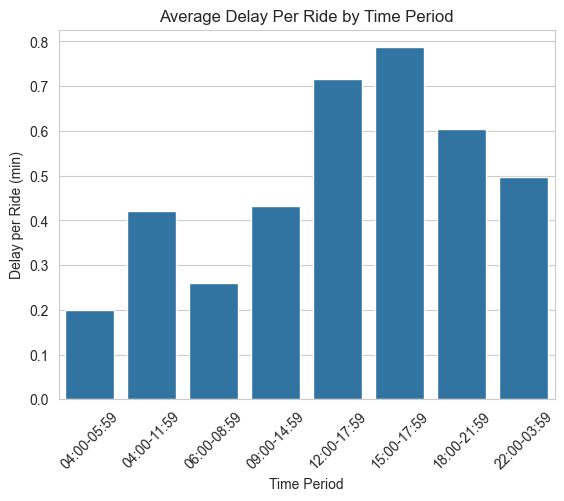

In [359]:
#Plot delay by time period
ax= sns.barplot(calgary_2018_time_total, x='Time Period', y='Delay_Per_Ride(min)')
plt.title('Average Delay Per Ride by Time Period')
plt.xlabel('Time Period') 
plt.ylabel('Delay per Ride (min)') 
plt.xticks(rotation=45)
plt.show()

### Day of the week analysis

In [138]:
def day_of_week_delay(merged_data):
    # Calculate delays per day and timeliness
    day_of_week_delay = merged_data.groupby([merged_data['incident_date_time'].dt.weekday, 'Timeliness']).size().reset_index(name='Count')
    # Calculate total incidents per day
    total_per_day = merged_data.groupby(merged_data['incident_date_time'].dt.weekday).size().reset_index(name='Total')
    total_per_day = total_per_day.rename(columns={'0': 'Total'})
    
    # Merge the DataFrames
    day_of_week_delay = pd.merge(day_of_week_delay, total_per_day, on='incident_date_time', how='left')
    #Calculate percent of total rides
    day_of_week_delay['Percentage']= day_of_week_delay['Count']/day_of_week_delay['Total']
    #reduce to only Early or Late delay
    day_of_week_delay = day_of_week_delay[day_of_week_delay['Timeliness'].isin(['E', 'L'])]
    
    # Changing Labels
    day_of_week_delay['incident_date_time'] = day_of_week_delay['incident_date_time'].replace({
        0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
    
    day_of_week_delay['Timeliness'] = day_of_week_delay['Timeliness'].replace({
        'E': '1-min before schedule', 'L': '5-min after schedule', 'N': 'On schedule' })
    
    return (day_of_week_delay)

day_of_week_delay_2018= day_of_week_delay(calgary_merged_2018)
day_of_week_delay_2019= day_of_week_delay(calgary_merged_2019)

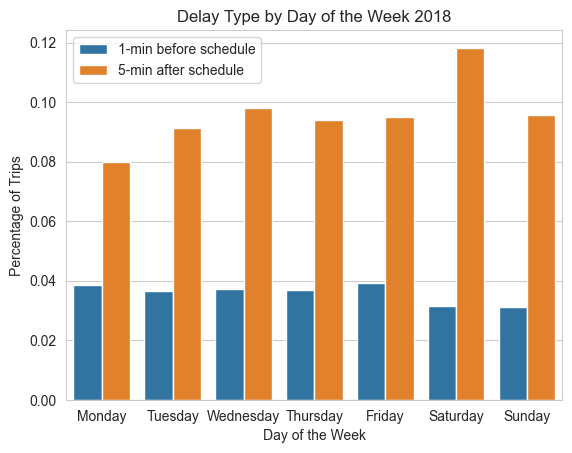

In [301]:
#Plot delay by day of the week
sns.barplot(day_of_week_delay_2018, x='incident_date_time', y='Percentage', hue='Timeliness')

plt.title('Delay Type by Day of the Week 2018')
plt.xlabel('Day of the Week') 
plt.ylabel('Percentage of Trips') 
plt.legend(loc='upper left')
plt.show()

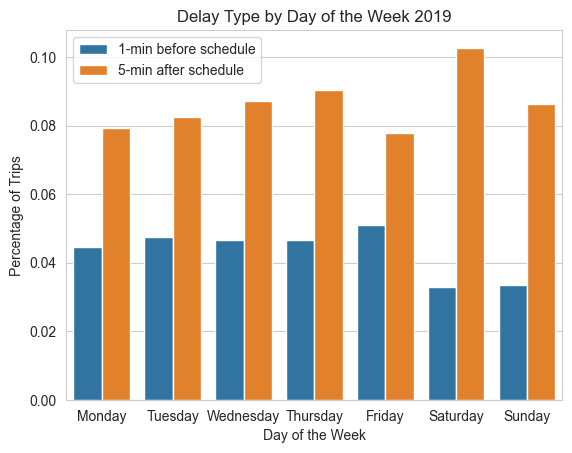

In [300]:
sns.barplot(day_of_week_delay_2019, x='incident_date_time', y='Percentage', hue='Timeliness')

plt.title('Delay Type by Day of the Week 2019')
plt.xlabel('Day of the Week') 
plt.ylabel('Percentage of Trips')
plt.legend(loc='upper left')
plt.show()

/var/folders/7k/4gfkrw9x6gl8hx102jx9lrx40000gn/T/ipykernel_47444/3580059365.py:20: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axes[1].get_shared_y_axes().join(axes[0], axes[1])


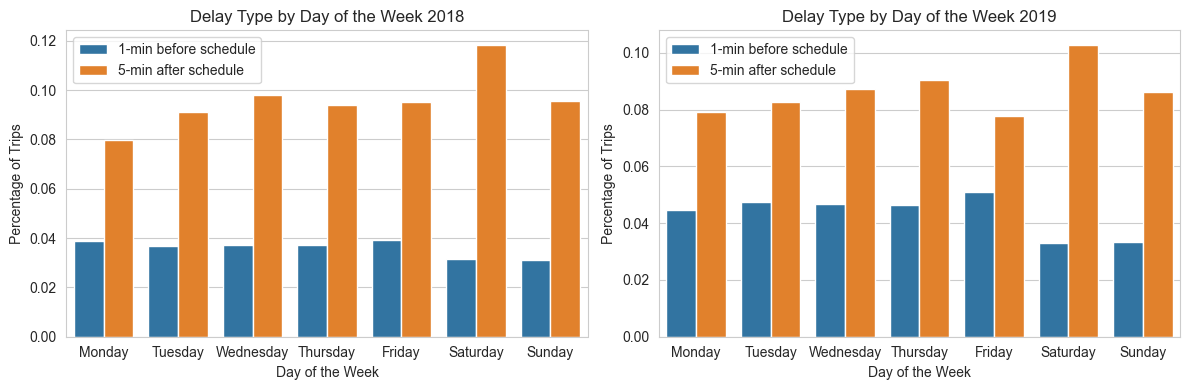

In [360]:
#Same plots on shared subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot the first graph on the left
sns.barplot(x='incident_date_time', y='Percentage', hue='Timeliness', data=day_of_week_delay_2018, ax=axes[0])
axes[0].set_title('Delay Type by Day of the Week 2018')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Percentage of Trips')
axes[0].legend()

# Plot the second graph on the right
sns.barplot(x='incident_date_time', y='Percentage', hue='Timeliness', data=day_of_week_delay_2019, ax=axes[1])
axes[1].set_title('Delay Type by Day of the Week 2019')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Percentage of Trips')
axes[1].legend()


# Adjust layout for better spacing
axes[1].get_shared_y_axes().join(axes[0], axes[1])
plt.tight_layout()

# Show the plots
plt.show()

### Temperature Comparison

/var/folders/7k/4gfkrw9x6gl8hx102jx9lrx40000gn/T/ipykernel_47444/1201463060.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


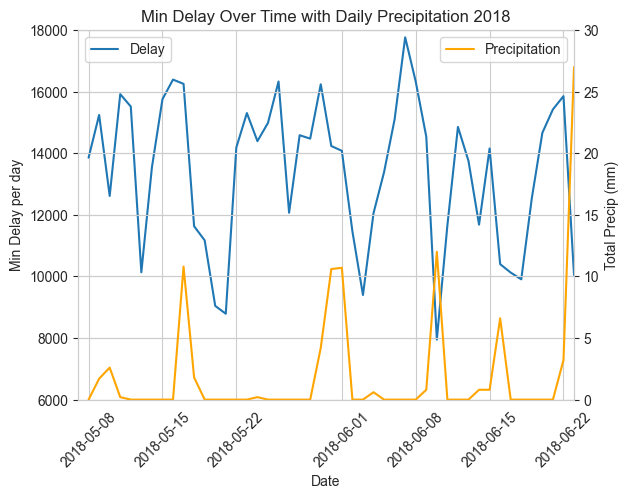

In [347]:
#Sum delay per day
delay_per_day= calgary_merged_2018.groupby(calgary_merged_2018['incident_date_time'].dt.date)['Delay_Est'].sum().reset_index(name= 'Count')

#Match column to merge data
calgary_weather['incident_date_time'] = calgary_weather['Date/Time'] 
delay_per_day_weather= pd.merge(delay_per_day, calgary_weather, on='incident_date_time', how='left')

#First line and first axis
ax1= sns.lineplot(x='incident_date_time', y='Count', data=delay_per_day, label= 'Delay')
ax1.set_ylabel('Min Delay per day')
ax1.set_xlabel('Date')
ax1.set_ylim([6000, 18000])
ax1.legend(loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Second line on the second y-axis
ax2 = ax1.twinx()
ax2.set_ylim([0, 30])
ax2.set_ylabel('Total Precip (mm)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper right')
sns.lineplot(x='incident_date_time', y='Total Precip (mm)', data=delay_per_day_weather, ax=ax2, color='orange', label= 'Precipitation')

# Limit the range (excluding last date which has no data)
plt.xlim([pd.to_datetime('2018-05-07'), pd.to_datetime('2018-06-23')])
plt.title('Min Delay Over Time with Daily Precipitation 2018')
plt.xticks(rotation=45)
plt.show()

/var/folders/7k/4gfkrw9x6gl8hx102jx9lrx40000gn/T/ipykernel_47444/1990799646.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


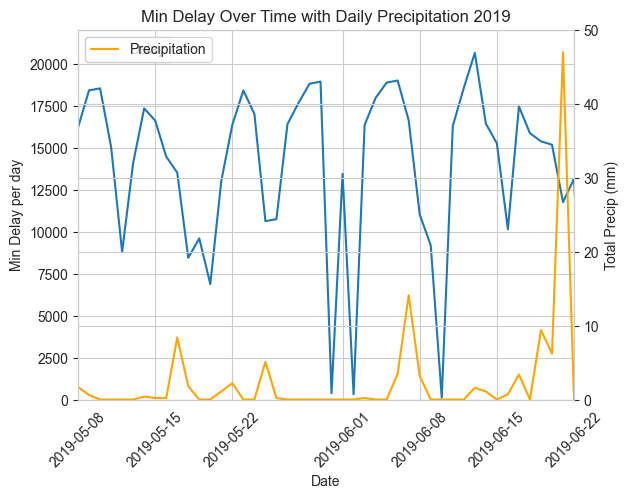

In [350]:
#Sum delay per day
delay_per_day= calgary_merged_2019.groupby(calgary_merged_2019['incident_date_time'].dt.date)['Delay_Est'].sum().reset_index(name= 'Count')

#Match column to merge data
calgary_weather['incident_date_time'] = calgary_weather['Date/Time'] 
delay_per_day_weather= pd.merge(delay_per_day, calgary_weather, on='incident_date_time', how='left')

#First line and first axis
ax1= sns.lineplot(x='incident_date_time', y='Count', data=delay_per_day, label= 'Delay')
ax1.set_ylabel('Min Delay per day')
ax1.set_xlabel('Date')
ax1.set_ylim([0, 22000])
ax1.legend(loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
# Second line on the second y-axis
ax2 = ax1.twinx()
ax2.set_ylim([0, 50])
ax2.set_ylabel('Total Precip (mm)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper right')
sns.lineplot(x='incident_date_time', y='Total Precip (mm)', data=delay_per_day_weather, ax=ax2, color='orange', label='Precipitation')

# Limit the range (excluding last date which has no data)
plt.xlim([pd.to_datetime('2019-05-08'), pd.to_datetime('2019-06-22')])
plt.title('Min Delay Over Time with Daily Precipitation 2019')

plt.show()

/var/folders/7k/4gfkrw9x6gl8hx102jx9lrx40000gn/T/ipykernel_47444/3967794973.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


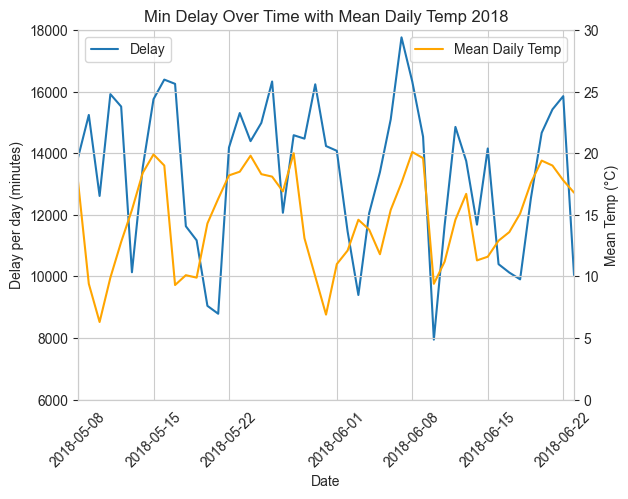

In [330]:
#Sum delay per day
delay_per_day= calgary_merged_2018.groupby(calgary_merged_2018['incident_date_time'].dt.date)['Delay_Est'].sum().reset_index(name= 'Count')

#Match column to merge data
calgary_weather['incident_date_time'] = calgary_weather['Date/Time'] 
delay_per_day_weather= pd.merge(delay_per_day, calgary_weather, on='incident_date_time', how='left')

#First line and first axis
ax1= sns.lineplot(x='incident_date_time', y='Count', data=delay_per_day, label= 'Delay')
ax1.set_ylabel('Delay per day (minutes)')
ax1.set_xlabel('Date')
ax1.set_ylim([6000, 18000])
ax1.legend(loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Second line on the second y-axis
ax2 = ax1.twinx()
ax2.set_ylim([0, 30])
ax2.set_ylabel('Mean Temp (°C)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper right')
sns.lineplot(x='incident_date_time', y='Mean Temp (°C)', data=delay_per_day_weather, ax=ax2, color='orange', label='Mean Daily Temp')

# Limit the range (excluding last date which has no data)
plt.xlim([pd.to_datetime('2018-05-08'), pd.to_datetime('2018-06-23')])
plt.title('Min Delay Over Time with Mean Daily Temp 2018')

plt.show()

/var/folders/7k/4gfkrw9x6gl8hx102jx9lrx40000gn/T/ipykernel_47444/1378716506.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


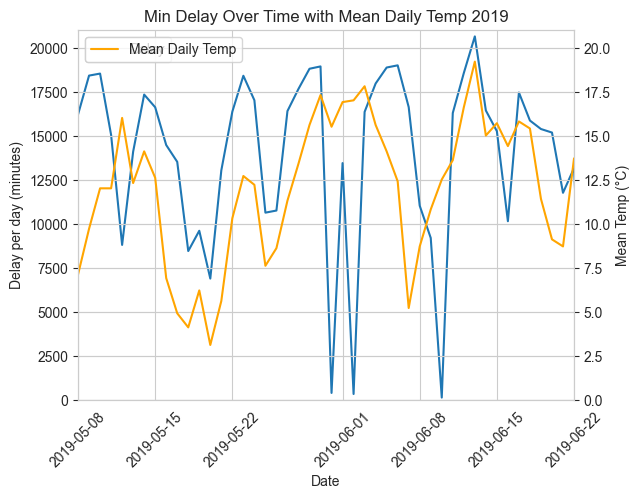

In [343]:
#Sum delay per day
delay_per_day= calgary_merged_2019.groupby(calgary_merged_2019['incident_date_time'].dt.date)['Delay_Est'].sum().reset_index(name= 'Count')

#Match column to merge data
calgary_weather['incident_date_time'] = calgary_weather['Date/Time'] 
delay_per_day_weather= pd.merge(delay_per_day, calgary_weather, on='incident_date_time', how='left')

#First line and first axis
ax1= sns.lineplot(x='incident_date_time', y='Count', data=delay_per_day, label= 'Delay')
ax1.set_ylabel('Delay per day (minutes)')
ax1.set_xlabel('Date')
ax1.set_ylim([0, 21000])
ax1.legend(loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Second line on the second y-axis
ax2 = ax1.twinx()
ax2.set_ylim([0, 21])
ax2.set_ylabel('Mean Temp (°C)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper right')
sns.lineplot(x='incident_date_time', y='Mean Temp (°C)', data=delay_per_day_weather, ax=ax2, color='orange', label='Mean Daily Temp')

# Limit the range (excluding last date which has no data)
plt.xlim([pd.to_datetime('2019-05-08'), pd.to_datetime('2019-06-22')])
plt.title('Min Delay Over Time with Mean Daily Temp 2019')

plt.show()
